In [53]:
import matplotlib.pyplot as plt
import numpy as np
import re
import json
from scipy import stats
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':'Arial'})
rc('text',usetex=True)
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['mathtext.rm'] = 'Arial'

In [3]:
tax_order = {}
tax_fam = {}
common = {}
latin = {}

neat = {}
malat = {}
length = {}
lengthM = {}
with open('Metadata') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if not line.startswith('#'):
            # Names and taxonomic data
            common[dat[0]] = dat[2].capitalize()
            latin[dat[0]] = dat[1]
            tax_order[dat[0]] = dat[17]
            tax_fam[dat[0]] = dat[18]
            
            
            # If predicted orthologs
            if line.startswith('GC'):
                # If NEAT1 is predicted
                if dat[3] == '1':
                    neat[dat[0]] = {'gaps':int(dat[9]),'start':int(dat[22]),
                                 'stop':int(dat[23]),'contig':dat[21],'dir':dat[24]}
                    if dat[7]:
                        neat[dat[0]]['PAS'] = int(dat[7])
                    if dat[8]:
                        neat[dat[0]]['AltPAS'] = int(dat[8])
                    length[dat[0]] = int(dat[5]) 
                # If MALAT1 is predicted
                if dat[4] == '1':
                    malat[dat[0]] = {'gaps':int(dat[11]),'start':int(dat[26]),
                                     'stop':int(dat[27]),'contig':dat[25],'dir':dat[28]}
                    lengthM[dat[0]] = int(dat[6])
            # Alternatively Reference orthologs
            else:
                if dat[3] == '1':
                    length[dat[0]] = int(dat[5])
                    neat[dat[0]] = {'PAS':int(dat[7]),'gaps':0}
                    if dat[8]:
                        neat[dat[0]]['AltPAS'] = int(dat[8])
                elif dat[4] == '1':
                    lengthM[dat[0]] = int(dat[6])
                    malat[dat[0]] = {'gaps':0}



In [22]:
#Dataset overview
print(f'The dataset contains {len(neat)} of NEAT1 orthologs and {len(malat)} of MALAT1')
print(f'Number of genomes in the dataset is {len(set([i for i in neat] + [i for  i in malat]))}')

a = len([i for i in neat if neat[i]['gaps'] == 0])
print(f'Number of NEAT1 orthologs without gaps in assembly is {a}, {round(a/len(neat)*100,2)}%')
a = len([i for i in malat if malat[i]['gaps'] == 0])
print(f'Number of MALAT1 orthologs without gaps in assembly is {a}, {round(a/len(malat)*100,2)}%')

The dataset contains 506 of NEAT1 orthologs and 469 of MALAT1
Number of genomes in the dataset is 547
Number of NEAT1 orthologs without gaps in assembly is 392, 77.47%
Number of MALAT1 orthologs without gaps in assembly is 449, 95.74%


### Plot results of identification of orthologs in the dataset, plotted per order

In [46]:
# List of orders per dataset ortholog
NEATSetOrders = [tax_order[i] for i in latin if i in neat]
#Dictionary with number of orders in NEAT1 orthologs subset
CountNSOrd = {}
for item in NEATSetOrders:
    if item not in CountNSOrd:
        CountNSOrd[item] = 0
    CountNSOrd[item] += 1
    
#Dictionary with number of orders in MALAT1 orthologs subset    
MALATSetOrders = [tax_order[i] for i in latin if i in malat]
CountMSOrd = {}
for item in MALATSetOrders:
    if item not in CountMSOrd:
        CountMSOrd[item] = 0
    CountMSOrd[item] += 1
    
# Dictionary with counted orders for the whole dataset
CountOrdAll = {}
for item in latin:
    # Human and mouse NEAT1 and MALAT1 have individual rows in Metadata,
    # need to exclude two of them to do not have overrepresentation
    if item not in ['Mouse_MALAT1','Human_MALAT1']:
        if tax_order[item] not in CountOrdAll:
            CountOrdAll[tax_order[item]] = 0
        CountOrdAll[tax_order[item]] += 1


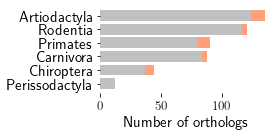

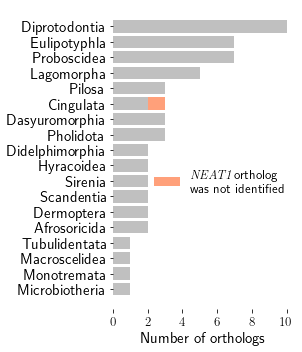

In [56]:
# Plot for NEAT1 orthologs
plt.figure(figsize=(4, 2))
order = sorted(CountOrdAll.keys(), key=lambda kv: CountOrdAll[kv],reverse=True)[:6]

pos = [i for i in range(len(order))][::-1]
val = [CountOrdAll[i] for i in order]

val2 = [CountNSOrd[i] if i in CountNSOrd else CountOrdAll[i] for i in order]


plt.barh(pos,val,color='lightsalmon')
plt.barh(pos,val2,color='silver')
plt.xticks(fontsize=13)
plt.yticks(pos,order,rotation=0,fontsize=15)
plt.box(False)

plt.xlabel('Number of orthologs',fontsize=15)
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1CountedOrdersInDataset_Part1.pdf',dpi=300)

plt.figure(figsize=(4.3, 5))
order = sorted(CountOrdAll.keys(), key=lambda kv: CountOrdAll[kv],reverse=True)[6:]

pos = [i for i in range(len(order))][::-1]
val = [CountOrdAll[i] for i in order]

val2 = [CountNSOrd[i] if i in CountNSOrd else CountOrdAll[i] for i in order]

plt.barh(pos,val,color='lightsalmon',label=r"$\mathit{ NEAT1 }$" + 'ortholog \nwas not identified')
plt.barh(pos,val2,color='silver')
plt.xlabel('Number of orthologs',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(pos,order,rotation=0,fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5),frameon=False,fontsize=13)

plt.box(False)
plt.tight_layout()
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1CountedOrdersInDataset_Part2.pdf',bbox_inches='tight',dpi=300)

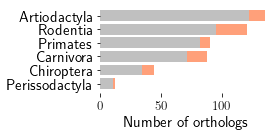

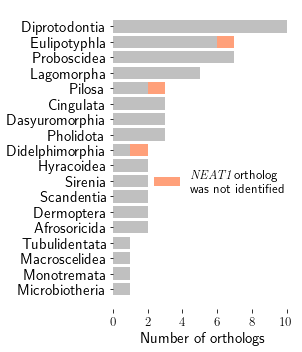

In [57]:
plt.figure(figsize=(4, 2))
order = sorted(CountOrdAll.keys(), key=lambda kv: CountOrdAll[kv],reverse=True)[:6]

pos = [i for i in range(len(order))][::-1]
val = [CountOrdAll[i] for i in order]

val2 = [CountMSOrd[i] if i in CountMSOrd else CountOrdAll[i] for i in order]

plt.barh(pos,val,color='lightsalmon',label='Missing')
plt.barh(pos,val2,color='silver')
plt.xticks(fontsize=13)
plt.yticks(pos,order,rotation=0,fontsize=15)
plt.box(False)

plt.xlabel('Number of orthologs',fontsize=15)
plt.tight_layout()
plt.savefig('./FiguresPublication/MALAT1CountedOrdersInDataset_Part1.pdf',dpi=300)

plt.figure(figsize=(4.3, 5))
order = sorted(CountOrdAll.keys(), key=lambda kv: CountOrdAll[kv],reverse=True)[6:]

pos = [i for i in range(len(order))][::-1]
val = [CountOrdAll[i] for i in order]

val2 = [CountMSOrd[i] if i in CountMSOrd else CountOrdAll[i] for i in order]

plt.barh(pos,val,color='lightsalmon',label=r"$\mathit{ NEAT1 }$" + 'ortholog \nwas not identified')
plt.barh(pos,val2,color='silver')
plt.xlabel('Number of orthologs',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(pos,order,rotation=0,fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5),frameon=False,fontsize=13)

plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/MALAT1CountedOrdersInDataset_Part2.pdf',dpi=300)

In [27]:
a = [lengthM[i] for i in lengthM if tax_order[i]=='Rodentia']
print(len(a),np.mean(a),np.std(a))

95 6652.989473684211 176.29702775276684


### Correlation of orthologs length with the phylogenetic distance from echidna

In [12]:

phylodist = {}
order = []
with open('phylodist_to_echidna') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        name = dat[1]
        order.append(name)
        phylodist[name] = float(dat[4])

dist = [phylodist[i] for i in order if i in neat]
lengths = [length[i] for i in order if i in neat]
print(f'Spearmans correlation between NEAT1 orthologs' + 
      f' length and position in phylogenetic tree: {stats.spearmanr(lengths,dist)}')

dist = [phylodist[i] for i in order if i in malat]
lengths = [length[i] for i in order if i in malat]
print(f'Spearmans correlation between MALAT1 orthologs length' +
      f' and position in phylogenetic tree: {stats.spearmanr(lengths,dist)}')



Spearmans correlation between NEAT1 orthologs length and position in phylogenetic tree: SpearmanrResult(correlation=-0.06168339306553171, pvalue=0.199131327243498)
Spearmans correlation between MALAT1 orthologs length and position in phylogenetic tree: SpearmanrResult(correlation=-0.07237566336005741, pvalue=0.16246594017183325)


### Plot Averaged ANI in different groups of orthologs

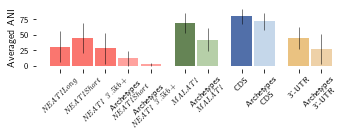

In [64]:
plt.figure(figsize=(5,2))

pos = [0,1,2]
val = [30.80296205449804,44.283624798710086,27.842945543280454]
err = [25.036495614637843,24.264148642811897,25.53719921898509]
plt.bar(pos,val,width=0.9,yerr=err, color='#fa766f',error_kw={'linewidth':0.5})

pos = [3,4]
val = [11.873771040991315,1.7252733135173848]
err = [12.133294510564587,2.7501362821689472]
plt.bar(pos,val,width=0.9,yerr=err, color='#ffa29e',error_kw={'linewidth':0.5})

pos = [5.5]
val = [68.49404314333749]
err = [16.115505903876805]
plt.bar(pos,val,width=0.9,yerr=err, color='#658455',error_kw={'linewidth':0.5})

pos = [6.5]
val = [41.79543673706534]
err = [18.168628174769147]
plt.bar(pos,val,width=0.9,yerr=err, color='#b6cfa8',error_kw={'linewidth':0.5})

pos = [8]
val = [79.40294462579602]
err = [11.613151078841568]
plt.bar(pos,val,width=0.9,yerr=err, color='#516fa9',error_kw={'linewidth':0.5})

pos = [9]
val = [71.3130783644836]
err = [14.229517316498551]
plt.bar(pos,val,width=0.9,yerr=err, color='#c5d7ea',error_kw={'linewidth':0.5})


pos = [10.5]
val = [44.27796549678823]
err = [17.78501000420325]
plt.bar(pos,val,width=0.9,yerr=err, color='#eac281',error_kw={'linewidth':0.5})

pos = [11.5]
val = [26.7123362629307]
err = [24.78559235084245]
plt.bar(pos,val,width=0.9,yerr=err, color='#eed1a8',error_kw={'linewidth':0.5})

r"$\mathit{ NEAT1 }$" + 'ortholog \nwas not identified'
plt.ylabel('Averaged ANI',fontsize=10)
plt.box(False)
plt.yticks([0,25,50,75],[0,25,50,75],fontsize=8)
plt.xticks([0,1,2,3,4,5.5,6.5,8,9,10.5,11.5],
           [r"$\mathit{NEAT1Long}$",r"$\mathit{NEAT1Short}$",r"$\mathit{NEAT1\ 3.5kb+}$",
            'Archetypes\n' + r"$\mathit{NEAT1Short}$",'Archetypes\n' + r"$\mathit{NEAT1\ 3.5kb+}$",r"$\mathit{MALAT1}$",
                'Archetypes\n' + r"$\mathit{MALAT1}$",
               'CDS','Archetypes\nCDS',"3'-UTR","Archetypes\n3'-UTR"],rotation=45,
          fontsize=8)
plt.tight_layout()
plt.savefig('./FiguresPublication/AveragedANI.pdf',dpi=300)

### Length distribution

In [62]:
Mars=['MONOTREMATA','DIDELPHIMORPHIA','MICROBIOTHERIA','DIPROTODONTIA','DASYUROMORPHIA']
LengthNEAT1Long = [length[i] for i in neat if neat[i]['gaps'] == 0]
LengthNEAT1LongMars = [length[i] for i in neat if tax_order[i].upper() in Mars and neat[i]['gaps'] == 0]
LengthNEAT1Short = [neat[i]['PAS'] for i in neat if 'PAS' in neat[i]]
LengthMALAT1 = [lengthM[i] for i in lengthM if malat[i]['gaps'] == 0]
LengthMALAT1Mars = [lengthM[i] for i in lengthM if tax_order[i].upper() in Mars]

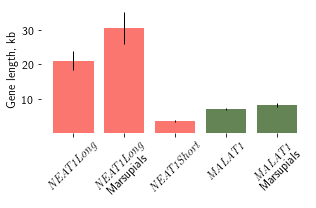

In [63]:
plt.figure(figsize=(4.5,3))
pos = [0,1,2]
val = [np.mean(LengthNEAT1Long),np.mean(LengthNEAT1LongMars),np.mean(LengthNEAT1Short)]
err = [np.std(LengthNEAT1Long),np.std(LengthNEAT1LongMars),np.std(LengthNEAT1Short)]

plt.bar(pos,val,yerr=err, color='#fa766f',error_kw={'linewidth':1})
pos = [3,4]

val = [np.mean(LengthMALAT1),np.mean(LengthMALAT1Mars)]
err = [np.std(LengthMALAT1),np.std(LengthMALAT1Mars)]

plt.bar(pos,val,yerr=err, color='#658455',error_kw={'linewidth':1})

plt.ylabel('Gene length, kb',fontsize=12)
plt.box(False)
plt.yticks([10000,20000,30000], ['10','20','30'],fontsize=12)
plt.xticks([i for i in range(5)],[r"$\mathit{NEAT1Long}$",r"$\mathit{NEAT1Long}$" + '\nMarsupials',
                                  r"$\mathit{NEAT1Short}$",r"$\mathit{MALAT1}$",r"$\mathit{MALAT1}$" + '\nMarsupials'],
          fontsize=12, rotation=45)
plt.tight_layout()
plt.savefig('./FiguresPublication/LengthVariation.pdf',dpi=400)

#### Longest and shortest NEAT1 orthologs

In [46]:
l = [length[item] for item in neat if neat[item]['gaps'] == 0]
print(max(l))
print(min(l))
print([(common[i],latin[i]) for i in neat if length[i] == max(l)])
print([(common[i],latin[i]) for i in neat if length[i] == min(l)])


36456
14505
[("Leadbeater's possum", 'Gymnobelideus leadbeateri')]
[('Plateau pika', 'Ochotona curzoniae')]


### Distance between NEAT1 and MALAT1 orthologs in mammals

In [47]:
distance = []
count = 0
for item in latin:
    if item in neat and item in malat:
        count += 1
        if neat[item]['contig'] == malat[item]['contig'] and neat[item]['dir'] == malat[item]['dir']:
            if neat[item]['dir'] == 'plus':
                a = malat[item]['start'] - neat[item]['stop']
            elif neat[item]['dir'] == 'minus':
                a = neat[item]['start'] - malat[item]['stop']
            distance.append(a)
            if neat[item]['dir'] != malat[item]['dir']:
                print(item)
print(count,len(distance),len(distance)/count*100)        

428 395 92.28971962616822


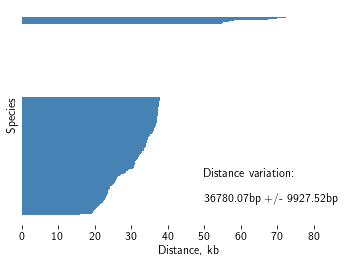

In [65]:
pos = [i for i in range(len(distance))]
val = sorted(distance)
t = 'Distance variation:\n\n' + str(round(np.mean(val),2)) + 'bp +/- ' + str(round(np.std(val),2)) + 'bp'
plt.barh(pos,val,color='steelblue')
#plt.xlim([0,11400])
plt.text(50000, 25, t,fontsize=12)
plt.xlabel('Distance, kb',fontsize=12)
plt.ylabel('Species',fontsize=12)
plt.xticks(range(0,90000,10000), [str(i) for i in range(0,90,10)], fontsize=12)
plt.box(False)
plt.yticks([])
plt.savefig('./FiguresPublication/DistanceNEAT1-MALAT1.pdf',dpi=300)

### Length distribution per order

In [4]:
#Get the order of orders along phylogenetic tree

orders_rev = []
with open('./PhyloTree/leaves_order_one_per_order') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        order = dat[0].split('_')[-1].capitalize()
        if 'artiodactyla' in order:
            orders_rev.append('Artiodactyla')
        else:
            orders_rev.append(order)
orders = orders_rev[::-1]
print(orders)

['Monotremata', 'Didelphimorphia', 'Dasyuromorphia', 'Diprotodontia', 'Microbiotheria', 'Macroscelidea', 'Afrosoricida', 'Tubulidentata', 'Sirenia', 'Proboscidea', 'Hyracoidea', 'Pilosa', 'Cingulata', 'Eulipotyphla', 'Perissodactyla', 'Pholidota', 'Carnivora', 'Artiodactyla', 'Chiroptera', 'Primates', 'Dermoptera', 'Scandentia', 'Lagomorpha', 'Rodentia']


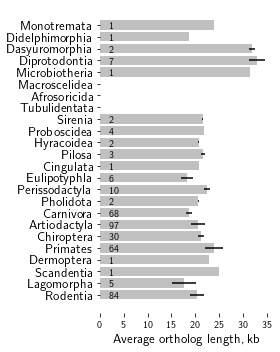

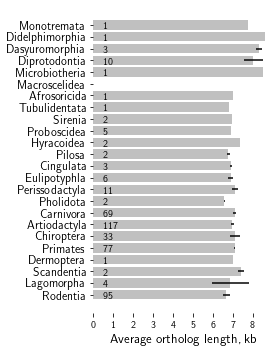

In [62]:
val = []
err = []
used = {}
for item in orders:
    av = []
    for gene in neat:
        if tax_order[gene] == item and neat[gene]['gaps'] == 0:
            av.append(length[gene])
    if av:
        used[item] = len(av)
        val.append(np.mean(av))
        err.append(np.std(av))
    else:
        val.append(0)
        err.append(0)
        
            
plt.figure(figsize=(4, 5))

pos = [i for i in range(len(orders))][::-1]
plt.barh(pos,val,xerr=err, color='silver')
for i in pos:
    name = orders[::-1][i]
    if name in used:
        plt.text(2000,i-0.3,used[name],fontsize=10)
plt.xlabel('Average ortholog length, kb',fontsize=13)
plt.xticks(range(0,40000,5000), [str(i) for i in range(0,40,5)])

plt.yticks(pos,orders,rotation=0,fontsize=13)
plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1LengthPerOrder.pdf',dpi=300)

val = []
err = []
used = {}
for item in orders:
    av = []
    for gene in malat:
        if tax_order[gene] == item and malat[gene]['gaps'] == 0:
            av.append(lengthM[gene])
    if av:
        used[item] = len(av)
        val.append(np.mean(av))
        err.append(np.std(av))
    else:
        val.append(0)
        err.append(0)
        
            
plt.figure(figsize=(4, 5))
pos = [i for i in range(len(orders))][::-1]

plt.barh(pos,val,xerr=err, color='silver')
for i in pos:
    name = orders[::-1][i]
    if name in used:
        plt.text(500,i-0.3,used[name],fontsize=10)
plt.xlabel('Average ortholog length, kb',fontsize=13)
plt.xticks(range(0,9000,1000), [str(i) for i in range(0,9)])
plt.yticks(pos,orders,rotation=0,fontsize=12)
plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/MALAT1LengthPerOrder.pdf',dpi=300)

### Statistics of TEs

In [66]:
TE = json.load(open("./TE/NEAT1_non_overlapping_TE.json","r"))

/home/ksenia/anaconda3/envs/sc/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


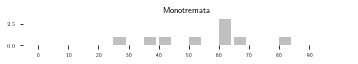

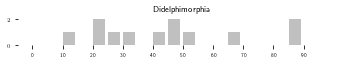

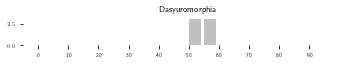

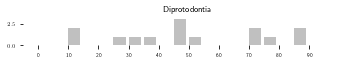

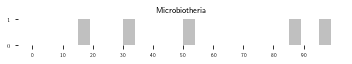

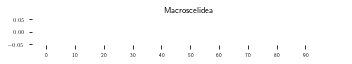

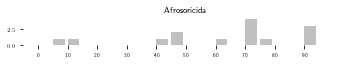

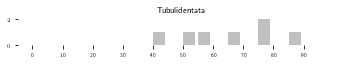

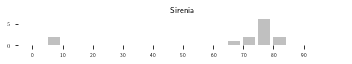

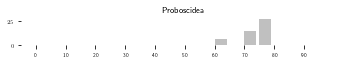

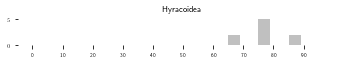

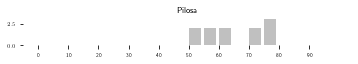

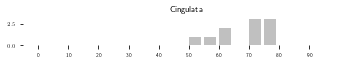

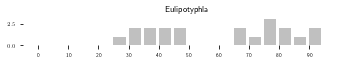

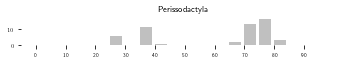

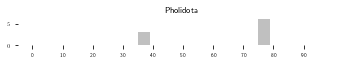

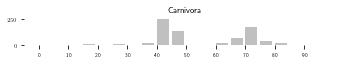

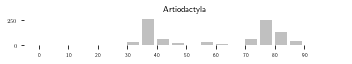

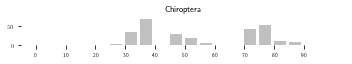

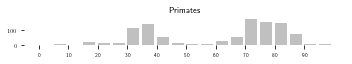

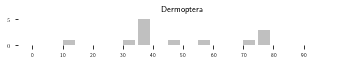

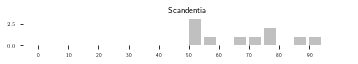

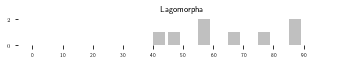

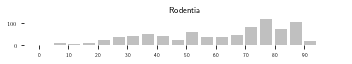

In [67]:
for k in range(len(orders)):
    order=orders[k]
    v = {i:[] for i in range(0,100,5)}
    for gene in neat:
        if tax_order[gene] == order:
            if gene in TE:
                for element in TE[gene]:
                    proportion = TE[gene][element][1]/length[gene]*100
                    for frag in v:
                        if proportion > frag and proportion <= frag + 5:
                            v[frag].append(1)

    val = []
    for i in range(0,100,5):
        if v[i]:
            val.append(sum(v[i]))
        else:
            val.append(0)
    pos = [i for i in range(len(val))]
    plt.figure(figsize=(5,1))
    plt.bar(pos,val,color='silver')
    plt.title(order,fontsize=8)
    plt.yticks(fontsize=5)
    plt.xticks([i-0.4 for i in range(0,20,2)],range(0,100,10),fontsize=5)

    plt.box(False)
    plt.tight_layout()
    plt.savefig('./FiguresPublication/TEBinned/' + order+ '.pdf',dpi=300)      

In [73]:
#TEs in NEAT1Short frequencies
pred = {gene:neat[gene]['PAS'] for gene in neat if 'PAS' in neat[gene]}
        
alltypes = ['LINE','SINE','DNA','Other']
TEstat = {}
for gene in neat:
    if gene in TE and gene in pred:
        for element in TE[gene]:
            if TE[gene][element][2] < pred[gene]:
                if gene not in TEstat:
                    TEstat[gene] = 0
                TEstat[gene] += 1
print(f'Number of orthologs with TE in NEAT1Short isoform is {len(TEstat)}' +
      f' with the mean number of TEs per isoform equal to {np.mean([TEstat[i] for i in TEstat])} \n')

c = {}
for item in TEstat:
    if tax_order[item] not in c:
        c[tax_order[item]] = 0
    c[tax_order[item]] += 1
print('Distribution of mammalian orders comprising cases of NEAT1Short isoforms with TEs:\n', c)

c = {}
for item in TEstat:
    if tax_fam[item] not in c:
        c[tax_fam[item]] = 0
    c[tax_fam[item]] += 1
print('\nDistribution of mammalian families comprising cases of NEAT1Short isoforms with TEs:\n', c)

Number of orthologs with TE in NEAT1Short isoform is 49 with the mean number of TEs per isoform equal to 1.0 

Distribution of mammalian orders comprising cases of NEAT1Short isoforms with TEs:
 {'Sirenia': 2, 'Primates': 11, 'Carnivora': 15, 'Rodentia': 18, 'Afrosoricida': 2, 'Dermoptera': 1}

Distribution of mammalian families comprising cases of NEAT1Short isoforms with TEs:
 {'Trichechidae': 1, 'Lemuridae': 6, 'Canidae': 15, 'Heteromyidae': 4, 'Capromyidae': 1, 'Cheirogaleidae': 2, 'Spalacidae': 1, 'Muridae': 4, 'Sciuridae': 3, 'Erethizontidae': 2, 'Cricetidae': 2, 'Dugongidae': 1, 'Tarsiidae': 1, 'Octodontidae': 1, 'Chrysochloridae': 1, 'Tenrecidae': 1, 'Cynocephalidae': 1, 'Indriidae': 1, 'Cercopithecidae': 1}


### Plot types of TEs in mammalian orders

In [75]:
# Prepare a dictionary with types of TE elements per ortholog
alltypes = ['LINE','SINE','DNA','Other']
TEstat = {}
for gene in neat:
    if gene in TE:
        TEstat[gene] = {}
        for element in TE[gene]:
            if 'LINE' in element:
                eltype = 'LINE'
            elif 'SINE' in element:
                eltype = 'SINE'
            elif 'DNA' in element:
                eltype = 'DNA'
            else:
                eltype = 'Other'

            if eltype not in TEstat[gene]:
                TEstat[gene][eltype] = 0
            TEstat[gene][eltype] += 1

print(TE['Human_NEAT1'])
print(TEstat['Human_NEAT1'])

{'DR0449173_LINE/L1._1325': [1325, 8092, 9201], 'DR0300694_LINE/L1._814': [814, 15840, 16548], 'DR0492213_SINE/Alu._340': [340, 19814, 20089], 'DR0134144_SINE/Alu._336': [336, 17804, 18067], 'DF0000052_SINE/Alu._312': [312, 16614, 16887], 'DR0108943_SINE/Alu._179': [179, 17532, 17678], 'DR0136238_SINE/Alu._143': [143, 17182, 17307], 'DR0392250_SINE/Alu._140': [140, 18529, 18667], 'DR0484076_LINE/L1._134': [134, 15594, 15704], 'DR0370985_LINE/L1._133': [133, 9897, 10029]}
{'LINE': 4, 'SINE': 6}


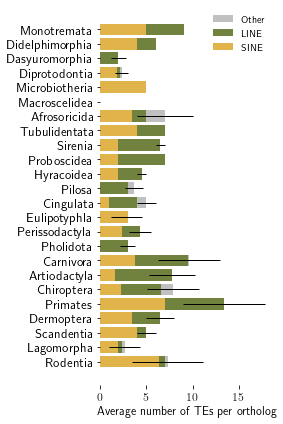

In [96]:
plt.figure(figsize=(4, 6))
val = []
err = []
for order in orders:
    av = []
    for gene in TEstat:
        if tax_order[gene] == order:
            av.append(sum([TEstat[gene][item] for item in TEstat[gene]]))
    val.append(np.mean(av))
    err.append(np.std(av))
pos = [i for i in range(len(orders))][::-1]

plt.barh(pos,val,xerr=err,color='silver',error_kw={'linewidth':1},label='Other')

val = []
for order in orders:
    av = []
    for gene in TEstat:
        if tax_order[gene] == order:
            av.append(sum([TEstat[gene][item] for item in ['SINE','LINE'] if item in TEstat[gene]]))
    val.append(np.mean(av))
pos = [i for i in range(len(orders))][::-1]

plt.barh(pos,val,color='#70823e',label='LINE')

val = []
for order in orders:
    av = []
    for gene in TEstat:
        if tax_order[gene] == order and 'SINE' in TEstat[gene]:
            av.append(TEstat[gene]['SINE'])
    val.append(np.mean(av))
pos = [i for i in range(len(orders))][::-1]

plt.barh(pos,val,color='#e0b44a',label='SINE')

plt.xlabel('Average number of TEs per ortholog',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(pos,orders,rotation=0,fontsize=13)
plt.box(False)
plt.legend(loc='upper right',frameon=False,fontsize=10)
plt.tight_layout()
plt.savefig('./FiguresPublication/TEsTypesPerOrder.pdf',dpi=300)

### Position of alternative PASs in NEAT1 orthologs

In [97]:
seq = {}
seq_file = 'NEAT1_gene_all.fasta'
with open(seq_file) as file1:
    fl = 0
    for line in file1:
        if line.startswith('>') and fl == 0:
            l = []
            name = line.rstrip().lstrip('>')
            fl = 1
        elif line.startswith('>') and fl == 1:
            seq[name] = ''.join(l)
            l = []
            name = line.rstrip().lstrip('>')
        elif not line.startswith('>'):
            l.append(line.strip())
    seq[name] = ''.join(l)

In [98]:
def index_finder(gene):
    kmer='AATAAA'
    indexes = []
    size = len(kmer)
    num_kmers = len(gene) - size + 1
    for i in range(num_kmers):
        loc_kmer = gene[i:i+size]
        if loc_kmer == kmer:
            indexes.append(i)
    return(indexes)
poly = {i:index_finder(seq[i]) for i in seq}

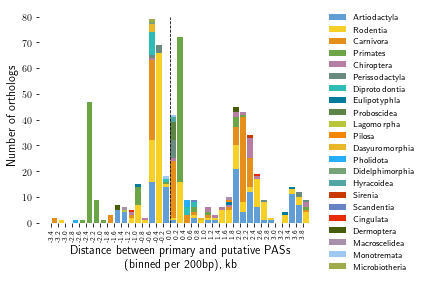

In [137]:
color = {'Monotremata': '#9ecaf1', 'Proboscidea': '#5d8445', 'Microbiotheria': '#9faa4a', 'Dasyuromorphia': '#e7b629',
 'Pilosa': '#f38603', 'Cingulata': '#e92b09', 'Tubulidentata': '#823d02', 'Diprotodontia': '#2dbcb6', 
 'NA': '#c18d44', 'Artiodactyla': '#619ed6', 'Dermoptera': '#475d0a', 'Sirenia': '#c93a00', 
 'Didelphimorphia': '#75a279', 'Lagomorpha': '#b9c53b', 'Rodentia': '#f7d027', 'Macroscelidea': '#a790aa',
 'Scandentia': '#6782c5', 'Eulipotyphla': '#007b9c', 'Chiroptera': '#b77ea3',
 'Pholidota': '#26aefa', 'Primates': '#6ba547', 'Perissodactyla': '#6a8a7f', 'Carnivora': '#e48f1b',
            'Hyracoidea':'#51A6A3', 'Afrosoricida':'#7c98ec'}

TaxDist = {i:[] for i in CountNSOrd}
dist = []

for gene in neat:
    if 'PAS' in neat[gene]:
        sites = poly[gene]

        index = sites.index(neat[gene]['PAS'])
        if index != 0:
            dist.append(int(sites[index - 1]) - int(neat[gene]['PAS']))
            TaxDist[tax_order[gene]].append(int(sites[index - 1]) - int(neat[gene]['PAS']))
        if len(sites) > (index + 1):
            a = int(sites[index + 1]) - int(neat[gene]['PAS'])
            if a < 4000:
                dist.append(a)
                TaxDist[tax_order[gene]].append(a)


positions = [i for i in range(min(dist),max(dist)+1)]
countPos = {i:0 for i in positions}
for item in dist:
    countPos[item] += 1

bins = [i/10 for i in range(-34,40,2)]
pos = [i for i in range(len(bins))]

vals = []
for i in range(-3400,4000,200):
    a = [countPos[i] for i in range(i,i+200) if i in countPos]
    vals.append(sum(a))

plt.bar(pos,vals,color='silver')

bottom = [0 for i in pos]
for taxon in sorted(CountNSOrd.keys(), key=lambda x: CountNSOrd[x], reverse=True):
    vals = []
    for i in range(-3400,4000,200):
        a = [j for j in TaxDist[taxon] if j in range(i,i+200)]
        vals.append(len(a))
    if sum(vals) > 0:
        plt.bar(pos,vals,color=color[taxon],bottom=bottom,label=taxon)
        for i in pos:
            bottom[i] += vals[i]
plt.legend(bbox_to_anchor=(1, 1),frameon=False,fontsize=8.5)

plt.vlines(16.5,ymin=0,ymax=80,linestyle='dashed',color='black',linewidth=0.8)
plt.xticks([i-0.5 for i in pos],bins,rotation=90,fontsize=7)
plt.xlabel('Distance between primary and putative PASs\n (binned per 200bp), kb',fontsize=12)
plt.ylabel('Number of orthologs',fontsize=12)
plt.box(False)

plt.tight_layout()
plt.savefig('./FiguresPublication/DistanceAltPAS.pdf',bbox_inches='tight',dpi=300)

### Distances between conserved motifs in triple helix

In [139]:
#Read file with multiple sequence alignment
msa = {}
seq_file = 'msa_NEAT1-MALAT1_triplex-trna.fasta'

with open(seq_file) as file1:
    fl = 0
    for line in file1:
        if line.startswith('>') and fl == 0:
            l = []
            name = line.rstrip().lstrip('>')
            fl = 1
        elif line.startswith('>') and fl == 1:
            msa[name] = ''.join(l)
            l = []
            name = line.rstrip().lstrip('>')
        elif not line.startswith('>'):
            l.append(line.strip())
    msa[name] = ''.join(l)

In [12]:
#Manually defined coordinates of regions between conserved motifs
#MSA was visualised with AlignmentViewer
print(msa['NEAT1_Marsupials_NEAT1'][10:60])
print(msa['NEAT1_Marsupials_NEAT1'][70:123])


cctgag--gccgcca-----t-gcagcc-----------------tcagg
cacc--cttaaa--------tctgtgag-----agaagagcgccc--------


In [142]:
n1 = []
n2 = []
m1 = []
m2 = []
for item in msa:
    if 'NEAT1' in item:
        n1.append(len([i for i in msa[item][10:60] if i != '-']))
        n2.append(len([i for i in msa[item][70:123] if i != '-']))
    if 'MALAT1' in item:
        m1.append(len([i for i in msa[item][10:60] if i != '-']))
        m2.append(len([i for i in msa[item][70:123] if i != '-']))
print('Triplex structure comprises three very conserved motifs and two varied sequences in between\n')
print('Length variation of these two fragments are:\n')
print(f'Average length of the first fragment of NEAT1 is {np.mean(n1)} +/- {np.std(n1)}')
print(f'Average length of the second fragment of NEAT1 is {np.mean(n2)} +/- {np.std(n2)}')
print(f'Average length of the first fragment of MALAT1 is {np.mean(m1)} +/- {np.std(m1)}')
print(f'Average length of the second fragment of MALAT1 is {np.mean(m2)} +/- {np.std(m2)}')


Triplex structure comprises three very conserved motifs and two varied sequences in between

Length variation of these two fragments are:

Average length of the first fragment of NEAT1 is 28.73611111111111 +/- 0.9818822806483202
Average length of the second fragment of NEAT1 is 29.817460317460316 +/- 1.0608531580895024
Average length of the first fragment of MALAT1 is 31.35632183908046 +/- 1.8728367535946662
Average length of the second fragment of MALAT1 is 23.588505747126437 +/- 1.7999633002233348


### SSR statistics

In [6]:
SSR = {}
count = 0
with open('./SSR_search/NEAT1_SSR.misa') as file1:
    for line in file1:
        if not line.startswith('ID'):
            dat = line.strip().split('\t')
            if dat[2] != 'c*':
                if dat[0] not in SSR:
                    SSR[dat[0]] = {}
                rep1 = dat[3].split('(')
                for item in rep1:
                    if item:
                        rep2 = item.split(')')[0]
                        if rep2 not in SSR[dat[0]]:
                            SSR[dat[0]][rep2] = 0
                        SSR[dat[0]][rep2] += 1

count = {}
for item in SSR:
    for rep in SSR[item]:
        if rep not in count:
            count[rep] = 0
        count[rep] += 1

repeats = {i:count[i] for i in count if count[i]>5}


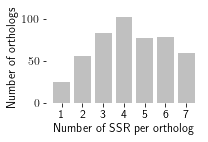

In [177]:
PerGene = [len(SSR[item]) for item in SSR]

val = []
for i in range(1,8):
    val.append(len([k for k in PerGene if k >= i and k < (i + 1)]))
pos = [i for i in range(1,len(val) + 1)]

plt.figure(figsize=(3, 2))
plt.bar(pos,val,color='silver')
plt.xlabel('Number of SSR per ortholog',fontsize=12)
plt.ylabel('Number of orthologs', fontsize=12)
plt.box(False)
plt.yticks(fontsize=12)
plt.xticks(pos,pos,fontsize=12)
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1_SSR_Frequency.pdf',dpi=300)

['T', 'A', 'GT', 'TG', 'G', 'C', 'GA', 'AT', 'TA', 'TC', 'AC', 'CA', 'AG', 'TTTG', 'CT', 'TTG', 'CCT', 'TTA', 'TTTA', 'GTGA', 'TCC', 'AAT', 'CTC', 'TGAA', 'GCCT', 'AGG', 'GGGA']


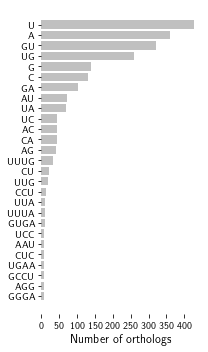

In [7]:
plt.figure(figsize=(3, 5))
order = sorted(repeats.keys(), key=lambda kv: repeats[kv],reverse=True)
print(order)
pos = [i for i in range(len(order))][::-1]
val = [repeats[i] for i in order]

plt.barh(pos,val,color='silver')

plt.xlabel('Number of orthologs',fontsize=12)

plt.box(False)
plt.yticks(pos, [i.replace('T','U') for i in order], fontsize=10)
plt.xticks([i for i in range(0,450,50)],[i for i in range(0,450,50)],fontsize=10)
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1_SSRs.pdf',dpi=300)

In [8]:
SSR = {}
count = 0
with open('./SSR_search/MALAT1_SSR.misa') as file1:
    for line in file1:
        if not line.startswith('ID'):
            dat = line.strip().split('\t')
            if dat[2] != 'c*':
                if dat[0] not in SSR:
                    SSR[dat[0]] = {}
                rep1 = dat[3].split('(')
                for item in rep1:
                    if item:
                        rep2 = item.split(')')[0]
                        if rep2 not in SSR[dat[0]]:
                            SSR[dat[0]][rep2] = 0
                        SSR[dat[0]][rep2] += 1

count = {}
for item in SSR:
    for rep in SSR[item]:
        if rep not in count:
            count[rep] = 0
        count[rep] += 1

repeats = {i:count[i] for i in count if count[i]>5}

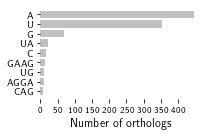

In [9]:
plt.figure(figsize=(3, 2))
order = sorted(repeats.keys(), key=lambda kv: repeats[kv],reverse=True)

pos = [i for i in range(len(order))][::-1]
val = [repeats[i] for i in order]

plt.barh(pos,val,color='silver')

plt.xlabel('Number of orthologs',fontsize=12)

plt.box(False)
plt.yticks(pos, [i.replace('T','U') for i in order], fontsize=10)
plt.xticks([i for i in range(0,450,50)],[i for i in range(0,450,50)],fontsize=9)
plt.tight_layout()
plt.savefig('./FiguresPublication/MALAT1_SSRs.pdf',dpi=300)


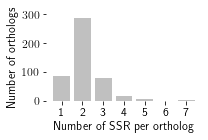

In [175]:
PerGene = [len(SSR[item]) for item in SSR]

val = []
for i in range(1,8):
    val.append(len([k for k in PerGene if k >= i and k < (i + 1)]))
pos = [i for i in range(1,len(val) + 1)]

plt.figure(figsize=(3, 2))
plt.bar(pos,val,color='silver')
plt.xlabel('Number of SSR per ortholog',fontsize=12)
plt.ylabel('Number of orthologs', fontsize=12)
plt.box(False)
plt.yticks(fontsize=12)
plt.xticks(pos,pos,fontsize=12)
plt.tight_layout()
plt.savefig('./FiguresPublication/MALAT1_SSR_Frequency.pdf',dpi=300)



### Self-complimentary regions in numbers

In [1]:
#Parsing blast output to collect only reverse complimentary regions
blastrc = {}
c = 1
with open('./BLAST_all_vs_all/NEAT1_all_vs_all.txt') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if int(dat[7]) < int(dat[6]):
            if dat[0] not in blastrc:
                blastrc[dat[0]] = {}
            if dat[1] not in blastrc[dat[0]]:
                blastrc[dat[0]][dat[1]] = {}
            a = [int(dat[4]),int(dat[6])]
            b = [int(dat[5]),int(dat[7])]
            blastrc[dat[0]][dat[1]][c] = [a,b,int(round(float(dat[3]),0))]
            c += 1

In [36]:
selfcomp = {}
count = 0

for item in neat:
    if item in blastrc:
        if item in blastrc[item]:
            selfcomp[item] = len(blastrc[item][item])
        else:
            count += 1

print(f'Number of orthologs with inner complimentarity is {len(selfcomp)}, without them {count}')
sorted_selfcomp = sorted(selfcomp.keys(), key=lambda x: selfcomp[x], reverse=True)
print('Top 10 orthologs with highest number of self-complimentary regions\n', sorted_selfcomp[:10])
print('\nThe ' + latin['GCA_907164525.1_mLopImh1.curated_primary_1811'] + ' has ' +
      str(selfcomp['GCA_907164525.1_mLopImh1.curated_primary_1811']) +
      ' regions of inner complementarity')

Number of orthologs with inner complimentarity is 358, without them 148
Top 10 orthologs with highest number of self-complimentary regions
 ['GCA_907164525.1_mLopImh1.curated_primary_1811', 'GCA_023807365.1_ASM2380736v1', 'GCA_023781915.1_ASM2378191v1', 'GCF_009764315.1_Tfra_2.0', 'GCA_009823505.1_RhiPru_1.0', 'GCA_028451465.1_mEreDor1.pri', 'GCA_950005125.1_mChiNiv1.1', 'GCF_008728515.1_Panubis1.0', 'GCF_000260255.1_OctDeg1.0', 'GCA_023783235.1_ASM2378323v1']

The Lophiomys imhausi has 132 regions of inner complementarity


14.681564245810057 20.84712232623435


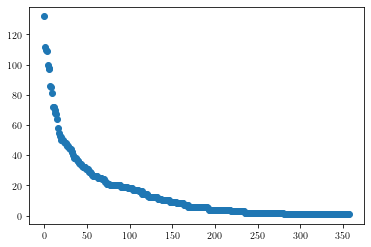

In [39]:
val = [selfcomp[i] for i in sorted_selfcomp]

plt.figure()
plt.plot(val,'o')

print(np.mean(val), np.std(val))


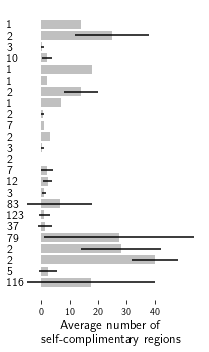

In [26]:
val = []
err = []
used = {}
for item in orders:
    av = []
    for gene in neat:
        if tax_order[gene] == item:
            if gene in d:
                av.append(d[gene][0])
            else:
                av.append(0)

    used[item] = len(av)
    val.append(np.mean(av))
    err.append(np.std(av))

        
            
plt.figure(figsize=(3, 5))

pos = [i for i in range(len(orders))][::-1]
plt.barh(pos,val,xerr=err, color='silver')
for i in pos:
    name = orders[::-1][i]
    if name in used:
        plt.text(-12,i-0.3,used[name],fontsize=12)
plt.xlabel('Average number of \nself-complimentary regions',fontsize=13)

plt.xticks(range(0,50,10),range(0,50,10))
plt.yticks([])
plt.box(False)
plt.tight_layout()
plt.savefig('./FiguresPublication/NEAT1SelfComplimentPerOrder.pdf',dpi=300)

In [40]:
# Same for MALAT1
blastrc = {}
c = 1
with open('./BLAST_all_vs_all/MALAT1_all_vs_all.txt') as file1:
    for line in file1:
        dat = line.strip().split('\t')
        if int(dat[7]) < int(dat[6]):
            if dat[0] not in blastrc:
                blastrc[dat[0]] = {}
            if dat[1] not in blastrc[dat[0]]:
                blastrc[dat[0]][dat[1]] = {}
            a = [int(dat[4]),int(dat[6])]
            b = [int(dat[5]),int(dat[7])]
            blastrc[dat[0]][dat[1]][c] = [a,b,int(round(float(dat[3]),0))]
            c += 1

Number of orthologs with inner complimentarity is 116, without them 346
Top 10 orthologs with highest number of self-complimentary regions
 ['GCA_004027875.1_AplRuf_v1_BIUU', 'GCA_025594165.1_ASM2559416v1', 'GCA_028534135.1_Potos_flavus_HiC', 'GCA_907164525.1_mLopImh1.curated_primary_1811', 'GCF_001984765.1_C.can_genome_v1.0', 'GCF_002099425.1_phaCin_unsw_v4.1', 'GCF_002940915.1_ASM294091v2', 'GCF_016433145.1_AgileGrace', 'GCA_000283155.1_CerSimSim1.0', 'GCA_000321225.1_Oros_1.0']
1.0689655172413792 0.25339549063274247


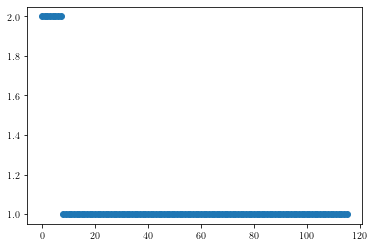

In [42]:
selfcomp = {}
count = 0

for item in malat:
    if item in blastrc:
        if item in blastrc[item]:
            selfcomp[item] = len(blastrc[item][item])
        else:
            count += 1

print(f'Number of orthologs with inner complimentarity is {len(selfcomp)}, without them {count}')
sorted_selfcomp = sorted(selfcomp.keys(), key=lambda x: selfcomp[x], reverse=True)
print('Top 10 orthologs with highest number of self-complimentary regions\n', sorted_selfcomp[:10])
val = [selfcomp[i] for i in sorted_selfcomp]

plt.figure()
plt.plot(val,'o')

print(np.mean(val), np.std(val))